# 04_evaluation

## Importando bibliotecas

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score, precision_score, recall_score, f1_score


## Carregando os dados

In [14]:
# Dados
X_train, X_test, y_train, y_test = joblib.load('../data/processed/train_test_data.pkl')
model = joblib.load('../data/processed/model_logreg.pkl')# if 'model_logreg.pkl' in '../data/processed/' else None
print(model)

LogisticRegression(max_iter=1000, random_state=42)


## Modelagem

In [15]:
# Previsões
y_pred = model.predict(X_test)

array([[  88,  239],
       [   9, 1664]], dtype=int64)

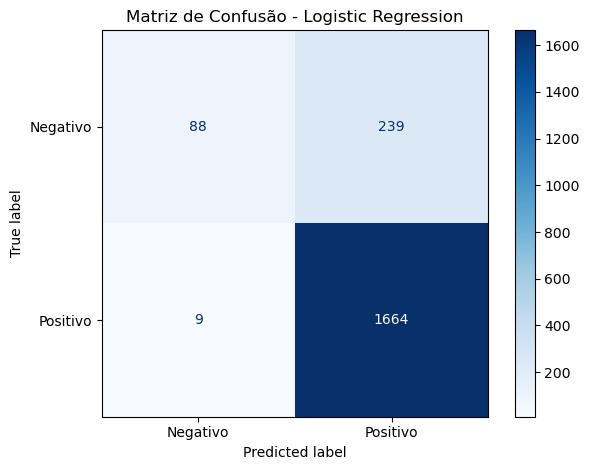

array([[0.26911315, 0.73088685],
       [0.00537956, 0.99462044]])

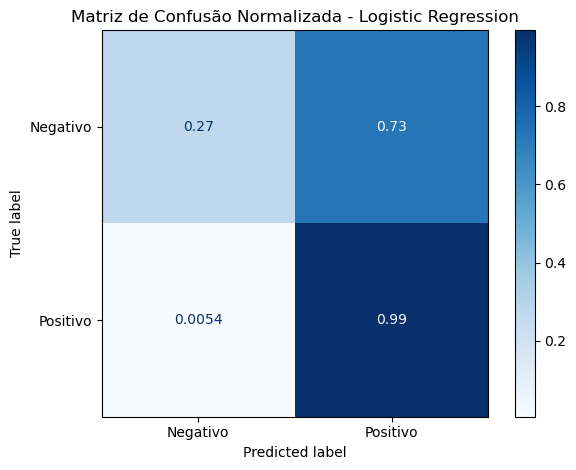

In [23]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
display(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negativo", "Positivo"])
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão - Logistic Regression')
plt.tight_layout()  # Evita que elementos do gráfico sejam cortados

# Salva o gráfico
plt.savefig('../reports/figures/ConfusionMatrix_logreg.png', dpi=300)

plt.show()

cm_norm = confusion_matrix(y_test, y_pred, normalize='true')
display(cm_norm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=["Negativo", "Positivo"])
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão Normalizada - Logistic Regression')
plt.tight_layout()  # Evita que elementos do gráfico sejam cortados

# Salva o gráfico
plt.savefig('../reports/figures/ConfusionMatrix_logreg_norm.png', dpi=300)

plt.show()

### 1. Classification Report

In [ ]:
# 1. Classification Report - Inclui precisão (precision), revocação (recall), F1-score e suporte para cada classe.
print(classification_report(y_test, y_pred, target_names=["Negativo", "Positivo"]))

              precision    recall  f1-score   support

    Negativo       0.91      0.27      0.42       327
    Positivo       0.87      0.99      0.93      1673

    accuracy                           0.88      2000
   macro avg       0.89      0.63      0.67      2000
weighted avg       0.88      0.88      0.85      2000



### 2. Acurácia (Accuracy)

In [ ]:
# 2. Acurácia (Accuracy) - Percentual total de acertos.
accuracy = accuracy_score(y_test, y_pred)
print(f'🎯 Acurácia: {accuracy:.4f}')

🎯 Acurácia: 0.8760


### 3. Curva ROC e AUC (Area Under the Curve)

📌 AUC: 0.93


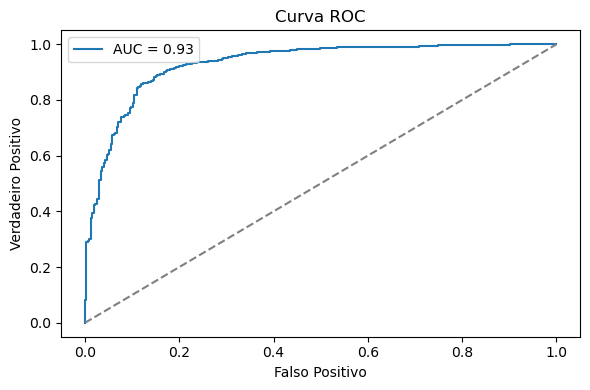

In [ ]:
# 3. Curva ROC e AUC (Area Under the Curve) - Mede a capacidade do modelo de distinguir entre as classes.
# Para modelos que oferecem probabilidade
y_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
print(f'📌 AUC: {roc_auc:.2f}')

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend()
plt.tight_layout()
plt.savefig('../reports/figures/roc_curve.png', dpi=300)
plt.show()


### 4. Precision-Recall Curve (útil para dados desbalanceados)

📌 Avg Precision: 0.98


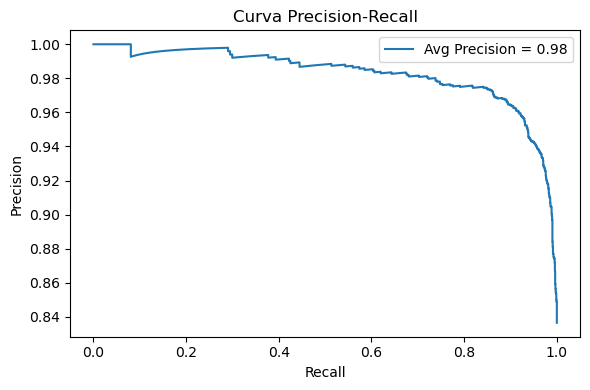

In [ ]:
# 4. Precision-Recall Curve (útil para dados desbalanceados)
precision, recall, _ = precision_recall_curve(y_test, y_proba)
avg_prec = average_precision_score(y_test, y_proba)
print(f'📌 Avg Precision: {avg_prec:.2f}')

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label=f'Avg Precision = {avg_prec:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend()
plt.tight_layout()
plt.savefig('../reports/figures/precision_recall_curve.png', dpi=300)
plt.show()


### 5. Métricas separadas (útil para logging e README)

In [ ]:
# 5. Métricas separadas 
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'📌 Precision: {precision:.2f}')
print(f'📌 Recall: {recall:.2f}')
print(f'📌 F1-score: {f1:.2f}')

📌 Precision: 0.87
📌 Recall: 0.99
📌 F1-score: 0.93


In [ ]:
# Exemplo de frases mal classificadas
df_text = pd.read_csv("../data/raw/Reviews.csv")

# Remover neutros (Score == 3)
df_text = df_text[df_text['Score'] != 3]

# Criar os labels
df_text['Sentiment'] = df_text['Score'].apply(lambda x: 1 if x > 3 else 0)

# Separar dados antes da vetorização
from sklearn.model_selection import train_test_split

X_train_text, X_test_text, y_train, y_test = train_test_split(
    df_text['Text'], df_text['Sentiment'], test_size=0.3, random_state=42
)

# # Depois disso você pode vetorizar:
# vectorizer = TfidfVectorizer(...)
# X_train = vectorizer.fit_transform(X_train_text)
# X_test = vectorizer.transform(X_test_text)

# # Fazer as previsões (após treino do modelo)
# y_pred = model.predict(X_test)

# Exibir frases mal classificadas
for i in range(5):
    real = y_test.values[i]
    pred = y_pred[i]
    if real != pred:
        print(f"🧾 Texto: {X_test_text.iloc[i][:300]}")
        print(f"👉 Real: {real} | Previsto: {pred}\n")
